Important: needs a pipeline that has word vectors included, for example:

    ✅ en_core_web_md (medium)
    ✅ en_core_web_lg (large)
    🚫 NOT en_core_web_sm (small)

In [ ]:
!python -m spacy download en_core_web_md

In [ ]:
import spacy
# Load a larger pipeline with vectors
nlp = spacy.load("en_core_web_md")

# Compare two documents
doc1 = nlp("I like fast food")
doc2 = nlp("I like pizza")
print(doc1.(doc2))

In [ ]:
# Compare two tokens
doc = nlp("I like pizza and pasta")
token1 = doc[]
token2 = doc[]
print(token1.(token2))

How does spaCy predict similarity?

* Similarity is determined using word vectors
* Multi-dimensional meaning representations of words
* Generated using an algorithm like Word2Vec and lots of text
* Can be added to spaCy's pipelines
* Default: cosine similarity, but can be adjusted
* Doc and Span vectors default to average of token vectors
* Short phrases are better than long documents with many irrelevant words

### Word Vector

In [ ]:
# Load a larger pipeline with vectors
nlp = spacy.load("en_core_web_md")

doc = nlp("I have an apple")
# Access the vector via the token.vector attribute
print(doc[3].)

Similarity depends on the application context

* Useful for many applications: recommendation systems, flagging duplicates etc.
* There's no objective definition of "similarity"
* Depends on the context and what application needs to do

doc1 = nlp("I like cats")
doc2 = nlp("I hate cats")

print(doc1.(doc2))

### Exercise:

#### Number 1:

In [ ]:
import spacy

# Load the en_core_web_md pipeline
nlp = ____

# Process a text
doc = nlp("Two apples in trees")

# Get the vector for the token "bananas"
bananas_vector = ____.____
print(bananas_vector)

#### Number 2: 

In [ ]:
import spacy

nlp = spacy.load("en_core_web_md")

doc1 = nlp("It's a warm summer day")
doc2 = nlp("It's sunny outside")

# Get the similarity of doc1 and doc2
similarity = ____.____(____)
print(similarity)

#### Number 3:

In [ ]:
import spacy

nlp = spacy.load("en_core_web_md")

doc = nlp("TV and books")
token1, token2 = doc[0], doc[2]

# Get the similarity of the tokens "TV" and "books"
similarity = ____.____(____)
print(similarity)

#### Number 4:

In [ ]:
import spacy

nlp = spacy.load("en_core_web_md")

doc = nlp("This was a great restaurant. Afterwards, we went to a really nice bar.")

# Create spans for "great restaurant" and "really nice bar"
span1 = ____
span2 = ____

# Get the similarity of the spans
similarity = ____.____(____)
print(similarity)

### Example Use Case:

In [6]:
import pandas as pd

#read the dataset with name "Fake_Real_Data.csv" and store it in a variable df
df = pd.read_csv("Fake.csv")

#print the shape of dataframe
print(df.shape)

#print top 5 rows
df.head(5)

(9900, 2)


,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [7]:
df['label_num'] = df['label'].map({'Fake' : 0, 'Real': 1})

In [8]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [9]:
df['vector'] = df['Text'].apply(lambda text: nlp(text).vector)  

In [10]:
df.head()

,Text,label,label_num,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[0.2852135, 0.1471193, -0.027056089, -0.094379..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[0.21878316, 0.15037002, 0.30523875, -0.098143..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[0.14520952, 0.11983009, 0.106786065, 0.006130..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[0.23895009, 0.055242084, 0.15995139, -0.11305..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[0.13075006, 0.095256045, 0.2594149, -0.080544..."


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values,
    df.label_num,
    test_size=0.2,
    random_state=2022
)

In [12]:
import numpy as np

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)


clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)

MultinomialNB()

In [15]:
from sklearn.metrics import classification_report

y_pred = clf.predict(scaled_test_embed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1024
           1       0.95      0.93      0.94       956

    accuracy                           0.94      1980
   macro avg       0.94      0.94      0.94      1980
weighted avg       0.94      0.94      0.94      1980



In [16]:
from  sklearn.neighbors import KNeighborsClassifier

#1. creating a KNN model object
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)

#4. print the classfication report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1024
           1       0.97      0.99      0.98       956

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980



In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[990,  34],
       [  8, 948]], dtype=int64)

Text(69.0, 0.5, 'Truth')

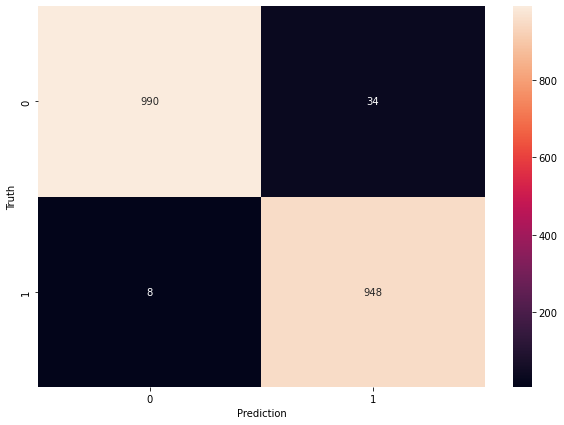

In [18]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')